# Import libraries and data

In [1]:
import pandas as pd
import string
import seaborn as sns

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from textblob import Word

%matplotlib inline

In [2]:
df = pd.read_csv('/Users/aaronschwartzman/projects/yelp_nlp/yelp_review_nlp_prediction/data/yelp_academic_dataset_review.csv')


In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


### Star Distribution

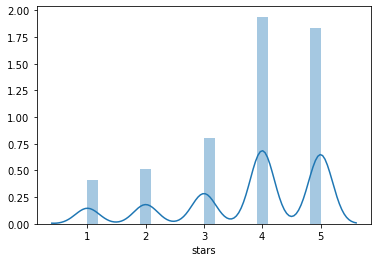

In [6]:
sns.distplot(df["stars"])

In [7]:
df["stars"].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

### Plot Data

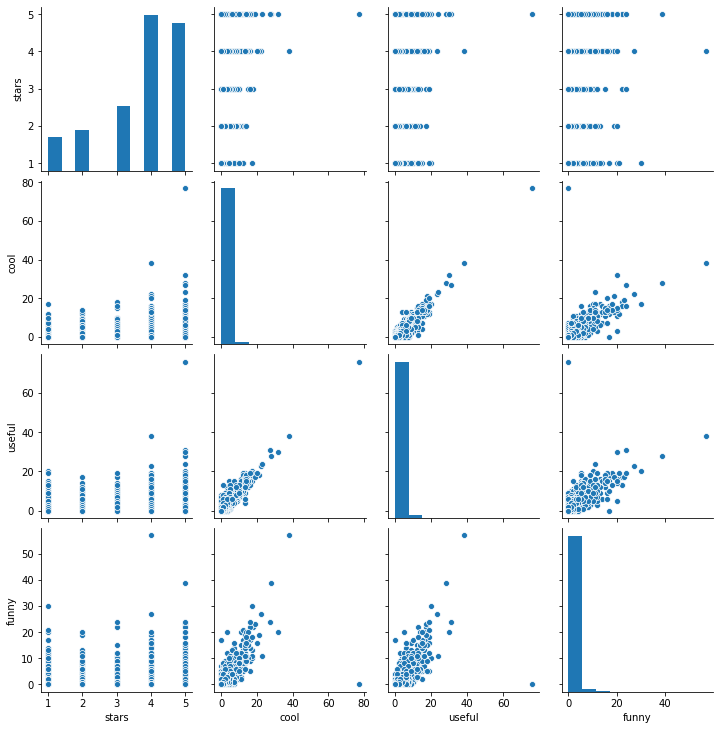

In [8]:
sns.pairplot(df)

### Filter data to 1 and 5 star reviews

In [9]:
df = df[(df["stars"] == 1) | (df["stars"] == 5)]


In [10]:
# Applying NLP vectorizer to text column and performance

X_Data = df["text"]
Y_Data = df["stars"]

cv = CountVectorizer()

X_Data = cv.fit_transform(X_Data)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size = 0.3, random_state = 101)
model = MultinomialNB()

model.fit(X_Train, Y_Train)
raw_text = model.predict(X_Test)

In [11]:
#lowercase text function
df["lower_case"] = df["text"].apply(lambda x: " ".join(word.lower() for word in x.split()))
df.head()

<ipython-input-11-755aead0131e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lower_case"] = df["text"].apply(lambda x: " ".join(word.lower() for word in x.split()))


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,lower_case
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,my wife took me here on my birthday for breakf...
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,i have no idea why some people give bad review...
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,"rosie, dakota, and i love chaparral dog park!!..."
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,general manager scott petello is a good egg!!!...
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,drop what you're doing and drive here. after i...


In [12]:
# Applying NLP vectorizer to lowercase data column and performance
X_Data = df["lower_case"]
Y_Data = df["stars"]

cv = CountVectorizer()

X_Data = cv.fit_transform(X_Data)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size = 0.3, random_state = 101)
model = MultinomialNB()

model.fit(X_Train, Y_Train)
lower_case = model.predict(X_Test)

In [13]:
#punctuation text function

df['punctuation'] = df['text'].str.replace('[^\w\s]', '')
df.head()

<ipython-input-13-8084a4b4c23b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['punctuation'] = df['text'].str.replace('[^\w\s]', '')


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,lower_case,punctuation
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,my wife took me here on my birthday for breakf...,My wife took me here on my birthday for breakf...
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,i have no idea why some people give bad review...,I have no idea why some people give bad review...
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,"rosie, dakota, and i love chaparral dog park!!...",Rosie Dakota and I LOVE Chaparral Dog Park Its...
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,general manager scott petello is a good egg!!!...,General Manager Scott Petello is a good egg No...
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,drop what you're doing and drive here. after i...,Drop what youre doing and drive here After I a...


In [14]:
# Applying NLP vectorizer to punctuation data column and performance
X_Data = df["punctuation"]
Y_Data = df["stars"]

cv = CountVectorizer()

X_Data = cv.fit_transform(X_Data)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size = 0.3, random_state = 101)
model = MultinomialNB()

model.fit(X_Train, Y_Train)
punctuation = model.predict(X_Test)


In [15]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,lower_case,punctuation
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,my wife took me here on my birthday for breakf...,My wife took me here on my birthday for breakf...
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,i have no idea why some people give bad review...,I have no idea why some people give bad review...
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,"rosie, dakota, and i love chaparral dog park!!...",Rosie Dakota and I LOVE Chaparral Dog Park Its...
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,general manager scott petello is a good egg!!!...,General Manager Scott Petello is a good egg No...
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,drop what you're doing and drive here. after i...,Drop what youre doing and drive here After I a...


In [16]:
stop_words = stopwords.words('english')

In [17]:
#  View stop words list
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
# stopwords removed function
df['stopwords_removed'] = df['text'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
df.head()

<ipython-input-18-b24d6ae1d4c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stopwords_removed'] = df['text'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,lower_case,punctuation,stopwords_removed
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,my wife took me here on my birthday for breakf...,My wife took me here on my birthday for breakf...,My wife took birthday breakfast excellent. The...
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,i have no idea why some people give bad review...,I have no idea why some people give bad review...,I idea people give bad reviews place. It goes ...
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,"rosie, dakota, and i love chaparral dog park!!...",Rosie Dakota and I LOVE Chaparral Dog Park Its...,"Rosie, Dakota, I LOVE Chaparral Dog Park!!! It..."
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,general manager scott petello is a good egg!!!...,General Manager Scott Petello is a good egg No...,General Manager Scott Petello good egg!!! Not ...
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,drop what you're doing and drive here. after i...,Drop what youre doing and drive here After I a...,Drop drive here. After I ate I go back next da...


In [19]:
# Applying NLP vectorizer to stopwords_removed data column and performance
X_Data = df["stopwords_removed"]
Y_Data = df["stars"]

cv = CountVectorizer()

X_Data = cv.fit_transform(X_Data)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size = 0.3, random_state = 101)
model = MultinomialNB()

model.fit(X_Train, Y_Train)
stopwords_removed = model.predict(X_Test)


In [20]:
# lemmatization function
df['lemmatized'] = df["text"].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))
df.head()

<ipython-input-20-1387a1c9e86d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized'] = df["text"].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,lower_case,punctuation,stopwords_removed,lemmatized
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,my wife took me here on my birthday for breakf...,My wife took me here on my birthday for breakf...,My wife took birthday breakfast excellent. The...,My wife took me here on my birthday for breakf...
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,i have no idea why some people give bad review...,I have no idea why some people give bad review...,I idea people give bad reviews place. It goes ...,I have no idea why some people give bad review...
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,"rosie, dakota, and i love chaparral dog park!!...",Rosie Dakota and I LOVE Chaparral Dog Park Its...,"Rosie, Dakota, I LOVE Chaparral Dog Park!!! It...","Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,general manager scott petello is a good egg!!!...,General Manager Scott Petello is a good egg No...,General Manager Scott Petello good egg!!! Not ...,General Manager Scott Petello is a good egg!!!...
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,drop what you're doing and drive here. after i...,Drop what youre doing and drive here After I a...,Drop drive here. After I ate I go back next da...,Drop what you're doing and drive here. After I...


In [21]:
df['lemmatized'] = df["text"].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))
X_Data = df["lemmatized"]
Y_Data = df["stars"]

cv = CountVectorizer()

X_Data = cv.fit_transform(X_Data)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size = 0.3, random_state = 101)
model = MultinomialNB()

model.fit(X_Train, Y_Train)
lemmatized = model.predict(X_Test)

<ipython-input-21-cda7717c8203>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized'] = df["text"].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))


In [22]:
print("TEXT SCORES BELOW")
print(classification_report(Y_Test, lemmatized))
print('LOWERCASE SCORES BELOW')
print(classification_report(Y_Test, lower_case))
print("PUNCTUATION SCORES BELOW")
print(classification_report(Y_Test, punctuation))
print("STOP-WORDS REMOVED SCORES BELOW")
print(classification_report(Y_Test, stopwords_removed))
print('LEMMATIZED SCORE BELOW')
print(classification_report(Y_Test, lemmatized))




TEXT SCORES BELOW
              precision    recall  f1-score   support

           1       0.86      0.69      0.77       228
           5       0.93      0.97      0.95       998

    accuracy                           0.92      1226
   macro avg       0.90      0.83      0.86      1226
weighted avg       0.92      0.92      0.92      1226

LOWERCASE SCORES BELOW
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226

PUNCTUATION SCORES BELOW
              precision    recall  f1-score   support

           1       0.88      0.67      0.76       228
           5       0.93      0.98      0.95       998

    accuracy                           0.92      1226
   macro avg       0.91      0.83      0.86      1226
weighted

# Conclusion:

### Lowercase input provides the highest weighted average f1-score of 93%

